In [39]:
from pydataset import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import env
from scipy import stats

## In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- ### print the first 3 rows
- ### print the number of rows and columns (shape)
- ### print the column names
- ### print the data type of each column
- ### print the summary statistics for each of the numeric variables

In [ ]:
iris = data('iris')
df_iris = pd.DataFrame(iris)

In [ ]:
df_iris.head(3)

In [ ]:
df_iris.shape

In [ ]:
df_iris.columns

In [ ]:
df_iris.dtypes

In [ ]:
df_iris.describe()

### Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.
- Make sure that the spreadsheet is publicly visible under your sharing settings.

In [ ]:
https://docs.google.com/spreadsheets/d/1v_R218o2cuT8LfTxmE8DyF_ujNeGcplDjFKvQ6yIFPs/edit#gid=1023018493
#     export?format=csv&gid=341089357'

In [ ]:
cust_detail = 'https://docs.google.com/spreadsheets/d/1xoh7F7OrZYjLzBU8bWfxCmtaM_PmW1qmUU2_mOeikjU/edit#gid=130156301'
cust_detail_csv = cust_detail.replace('/edit#gid=', '/export?format=csv&gid=')
cust_detail_csv

In [ ]:
df_google_sheets =  pd.read_csv(cust_detail_csv)
df_google_sheets.head()

- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
# first 100 rows
df_google_sheets_sample = df_google_sheets.head(100)
df_google_sheets_sample.head()

In [ ]:
# no of rows and columns for new dataframe
df_google_sheets_sample.shape

In [ ]:
#7049 rows, 13 columns in original dataframe
df_google_sheets.shape

In [ ]:
len(df_google_sheets)

In [ ]:
# first 5 columns of the original dataframe df_google_sheets
df_google_sheets.columns[:5]

In [ ]:
#datatypes of each columns
df_google_sheets.dtypes

In [ ]:
# columns with 'object' datatypes
df_google_sheets.columns[df_google_sheets.dtypes == 'object']

In [ ]:
df_google_sheets.select_dtypes(include='object').columns.tolist()

In [ ]:
#transpose of a dataframe summary
sum_stats= df_google_sheets[['monthly_charges','total_charges','tenure']].describe().T
sum_stats

In [ ]:
## range values for (month,total) charges and tenure which are numerical datatypes
sum_stats['range_stats']=sum_stats['max'] - sum_stats['min']
sum_stats

### Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). ### Read the Table1_CustDetails worksheet into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
df_excel = pd.read_excel('customer.xlsx')
df_excel.head()

In [ ]:
# first 100 rows
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

In [ ]:
df_excel.shape

In [ ]:
#columns with object datatypes
df_excel.columns[df_excel.dtypes == 'object']

In [ ]:
# first 5 columns
df_excel.columns[:5]

In [ ]:
#range for numeric column
numeric = df_excel[['monthly_charges','total_charges','tenure']].describe().T
numeric

In [ ]:
numeric['range']= numeric['max'] - numeric['min']
numeric

### Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [ ]:
train = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
train_csv = train.replace('/edit#gid=', '/export?format=csv&gid=')
train_csv

In [ ]:
df_google = pd.read_csv(train_csv)
df_google.head()

In [ ]:
# first 3 rows
df_google.head(3)

In [ ]:
# no of rows and column
df_google.shape

In [ ]:
#columns name 
df_google.columns.to_list()

In [ ]:
# datatypes of each column
df_google.dtypes

In [ ]:
#shows non-null values and datatypes of each column
df_google.info()

In [ ]:
#summary statistics
df_google.describe()

In [ ]:
# unique values in each column
for col in df_google.columns:
    if df_google[col].dtypes =='object':
        print(f'{col} has {df_google[col].nunique()} unique values')

# Exploratory Analysis


## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

- Acquire, prepare & split your data.

- ### Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [7]:
from acquire import get_iris_data
from prepare import prep_iris, train_validate_test_split
from sklearn.model_selection import train_test_split


In [3]:
df = get_iris_data()
df = df.drop(columns=['species_id','measurement_id','Unnamed: 0'])
df = df.rename(columns={'species_name':'species'})

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
train, validate, test = train_validate_test_split(df,target='species')
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Univariate Stats

In [9]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [20]:
#plotting all the numeric columns
num_col = train.columns[[train[col].dtype=='float64' for col in train.columns]]
num_col

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

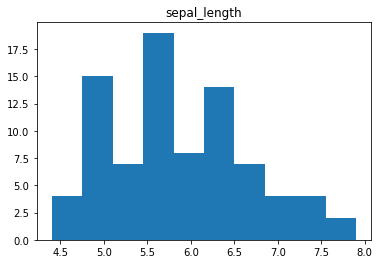

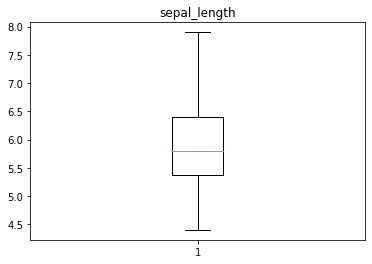

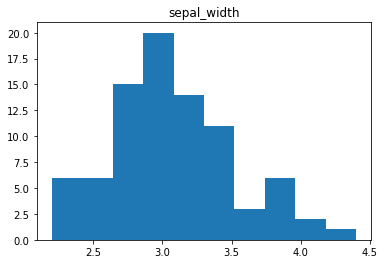

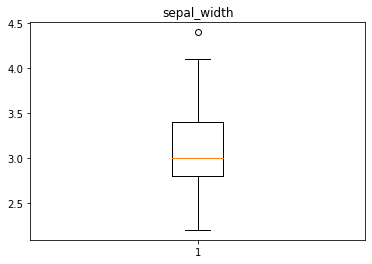

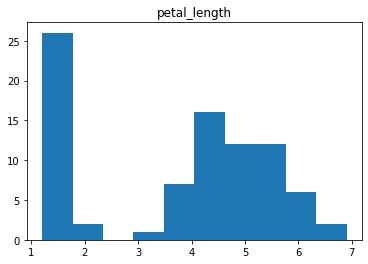

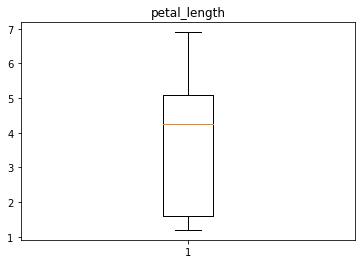

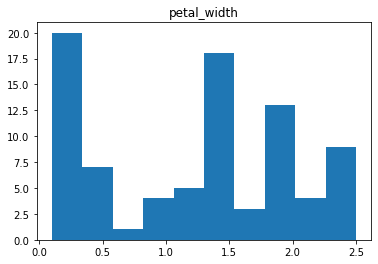

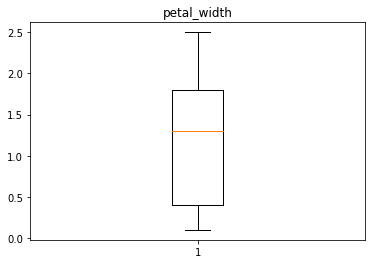

In [21]:
for col in num_col:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [22]:
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

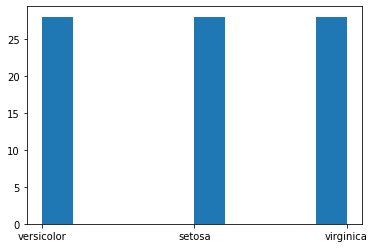

In [23]:
plt.hist(train.species)

## Bivariate stats

- #### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- #### For each measurement type, compute the descriptive statistics for each species.

- #### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- #### Document takeaways & any actions.

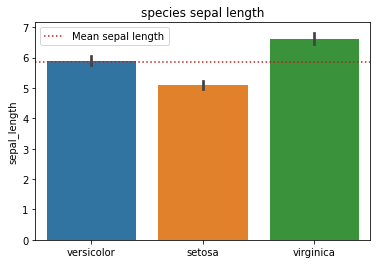

In [29]:
plt.title('species sepal length')
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='firebrick', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()


# bar plot below shows  virginica species has high mean sepal length

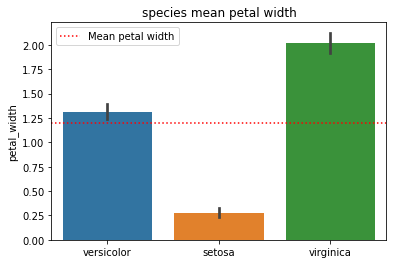

In [31]:
plt.title("species mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

## setosa pecies has small mean petal width

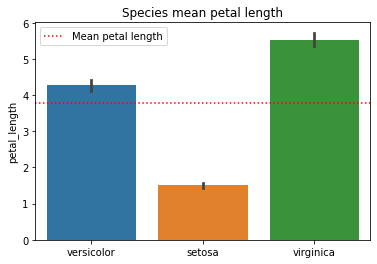

In [32]:
plt.title("Species mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

## virginica has high mean petal length

In [36]:
# Virginica descriptive statisstics
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [37]:
# Setosa descriptive statisstics
train[train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [38]:
# Versicolor descriptive statisstics
train[train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


In [40]:
#For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) 
#to see if there is a significant difference between the two groups. Do the same for the other measurement types.
virginica= train[train.species=='virginica']
versicolor= train[train.species =='versicolor']
setosa= train[train.species =='setosa']


t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
t, p

(767.0, 3.235595834904965e-10)

In [46]:
species_part= ['sepal_length','sepal_width','petal_length']
for parts in species_part:
    t,p = stats.mannwhitneyu(virginica[parts], versicolor[parts], alternative="greater")
    print(f'comparison of {parts} between Virginica and versicolor')
    print(t, p)
    
    print('\n')

comparison of sepal_length between Virginica and versicolor
676.5 1.541014598267054e-06


comparison of sepal_width between Virginica and versicolor
510.0 0.02628629569922847


comparison of petal_length between Virginica and versicolor
776.5 1.4739917857575313e-10




#### Observations made

- Virginica has largest petals
- Setosa has smallest petals
- petal length and petal width separates more species than other measurements

## 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

In [48]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51


In [49]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [51]:
train.groupby('species')['sepal_area'].sum()

species
setosa        497.30
versicolor    463.09
virginica     551.46
Name: sepal_area, dtype: float64

In [52]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

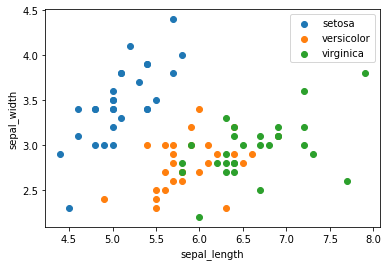

In [53]:
scatter_species(x,y)

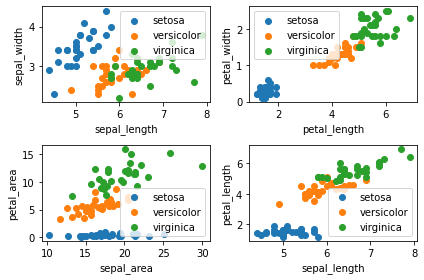

In [54]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

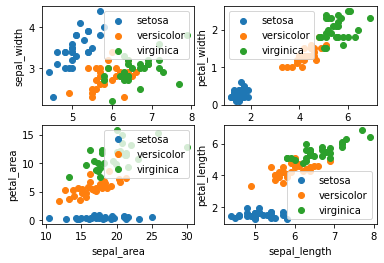

In [56]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

### key takeaways
- sepal_length is useful, sepal_width not great but likely adds some value.
- petal_area is very useful, as we would expect given the previous plot of petal_width x petal length.
- sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton.

In [57]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

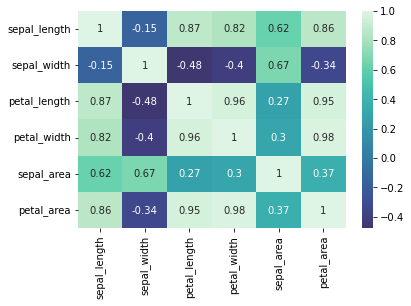

In [60]:
sns.heatmap(train.corr(),cmap='mako', center =0, annot=True)
plt.show

## takeaways from heatmap/ correlation
- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)
- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)


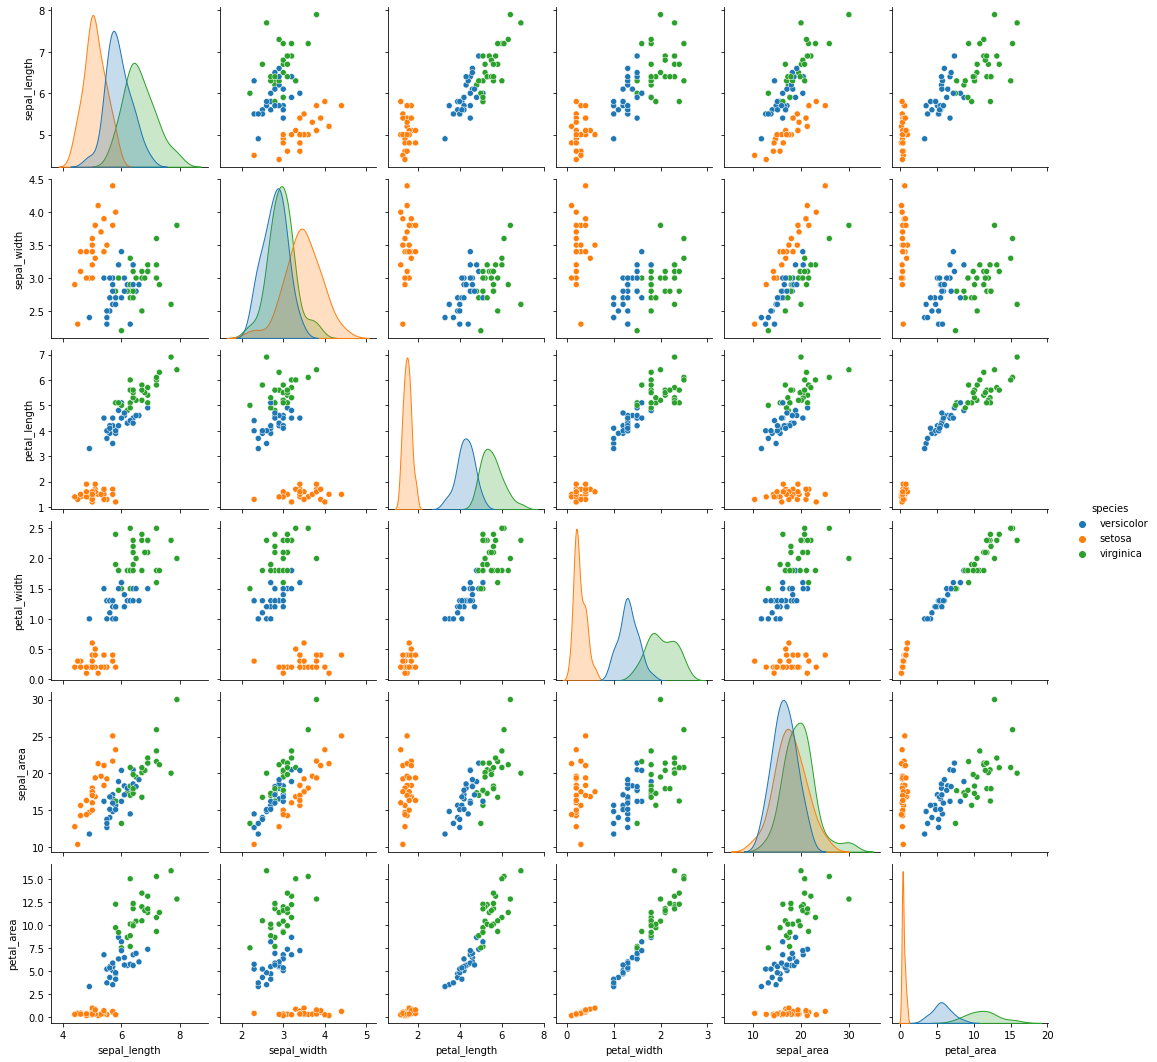

In [61]:
sns.pairplot(train, hue='species')
plt.show()

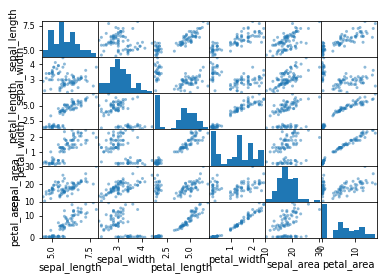

In [62]:
pd.plotting.scatter_matrix(train)
plt.show()

## Hypothesis
- α = 0.05
- $H_o$= sepal length is same in virginica and versicolor
- $H_a$=Sepal length significantly different in virginica and versicolor

In [63]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

In [64]:
virginica.describe()['sepal_length']

count    28.000000
mean      6.625000
std       0.532378
min       5.800000
25%       6.300000
50%       6.450000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64

In [65]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64

In [68]:
t, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )


t,p

(5.656491804882077, 6.856736413800083e-07)

In [ ]:
# p< α, so we reject null hypothesis

In [69]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=510.0, pvalue=0.05257259139845694)

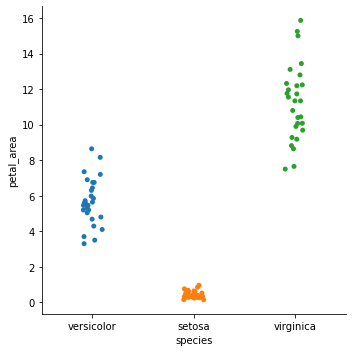

In [70]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

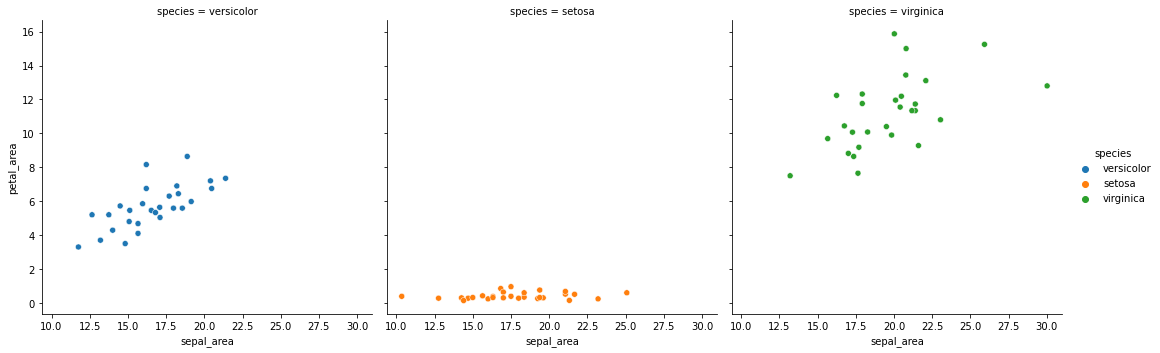

In [71]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')
